## Task2:MOVIE RATING PREDICTION WITH PYTHON
### Project Goal:
The main objective of this project is to analyze historical movie data and develop a model that accurately estimates the rating given to a film by users or critics


### Import Modeles:

In [1]:
#importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#choose plots style
sns.set_style('darkgrid')
#make sure plots are inline with the notebook
%matplotlib inline

### Loading Dataset:

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Explorartory Data Analysis
#### Missing Data

In [6]:
df.isna().any()

Name        False
Year         True
Duration     True
Genre        True
Rating       True
Votes        True
Director     True
Actor 1      True
Actor 2      True
Actor 3      True
dtype: bool

<Axes: >

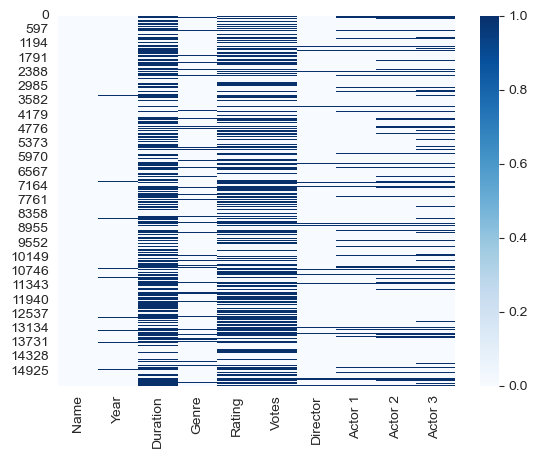

In [7]:
sns.heatmap(df.isnull(),cmap='Blues')

In [8]:
df.isnull().sum().sort_values(ascending=False)

Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
Name           0
dtype: int64

In [9]:
df.dropna(subset=['Rating','Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
df.isnull().sum().sort_values(ascending=False)

Duration    1899
Name           0
Year           0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [10]:
df['Duration'] = df['Duration'].str.replace(' min','').astype(float)

In [11]:
df['Duration'].fillna(df['Duration'].mean(), inplace = True)
df.isna().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [12]:
df.shape

(7558, 10)

In [13]:
### Check if there is any duplicated rows in our data
df.duplicated().any()

False

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), object(8)
memory usage: 649.5+ KB


In [16]:
df['Votes'] = df['Votes'].str.replace(',','').astype(int)

In [17]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
df['Year'] = df['Year'].str.strip('()').astype(int)

In [19]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [21]:
df.describe()

,Year,Duration,Rating,Votes
count,7558.000000,7558.000000,7558.000000,7558.000000
mean,1993.421011,133.439124,5.811127,2029.123842
std,20.004711,21.908841,1.368255,11868.695754
min,1917.000000,21.000000,1.100000,5.000000
25%,1980.000000,125.000000,4.900000,18.000000
50%,1996.000000,133.439124,6.000000,61.000000
75%,2011.000000,144.000000,6.800000,456.000000
max,2021.000000,321.000000,10.000000,591417.000000


#### Vizualisation

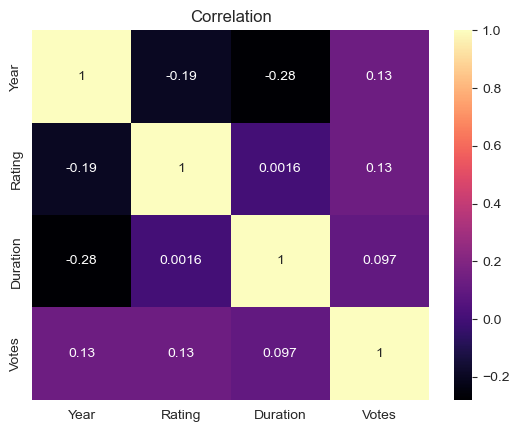

In [22]:
selected_columns = ['Year', 'Rating', 'Duration', 'Votes']
correlation_subset = df[selected_columns].corr()
sns.heatmap(correlation_subset, annot=True, cmap='magma')
plt.title('Correlation')
plt.show()

Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Biography, Family                  8.30
Animation, Comedy, Family          8.30
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Crime, Drama, History              8.05
Fantasy, Musical, Mystery          8.00
Comedy, Musical, Drama             8.00
Documentary, History, News         8.00
Documentary, History               7.95
Animation, Adventure, Drama        7.90
Name: Rating, dtype: float64

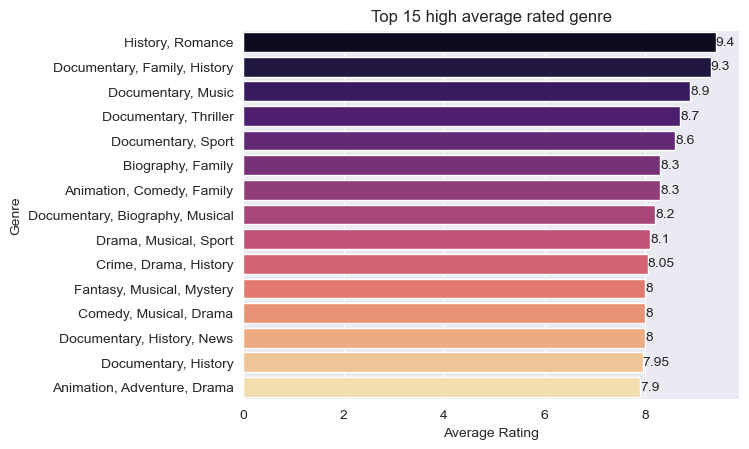

In [23]:
# plot top ten high average rated genre 
genre_rate = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(15)
display(genre_rate)
ax = sns.barplot(x=genre_rate.values, y=genre_rate.index, palette='magma')
ax.bar_label(ax.containers[0])
plt.title('Top 15 high average rated genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

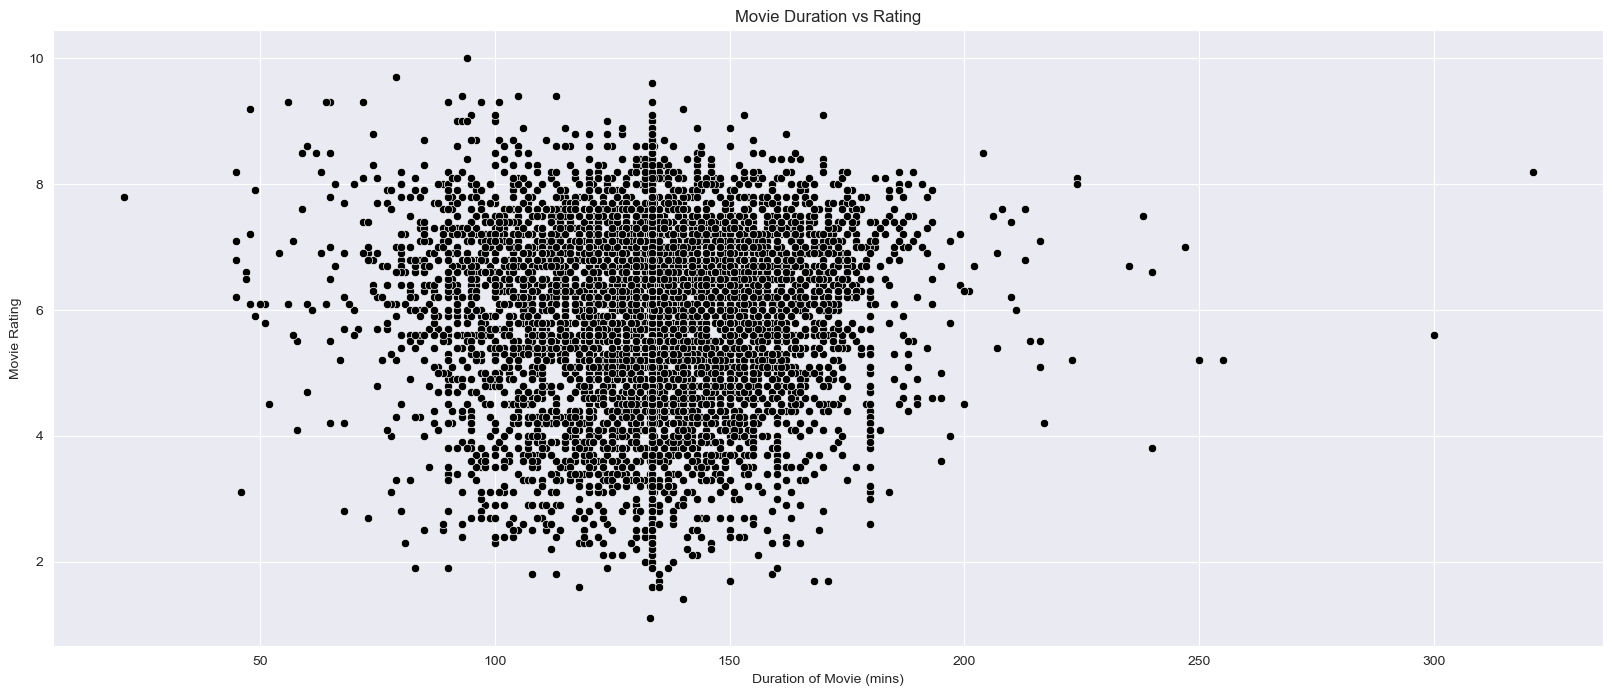

In [24]:
plt.figure(figsize=(20, 8))
# create a scatter plot with Duration and Rating relationship
sns.scatterplot(x=df['Duration'], y=df['Rating'],  color = 'k')
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

Year
1948    7.135294
1940    7.050000
1950    7.031034
1952    6.937500
1949    6.826087
          ...   
1991    5.127612
2004    5.108511
1995    5.059574
2000    5.050435
2002    5.033858
Name: Rating, Length: 92, dtype: float64

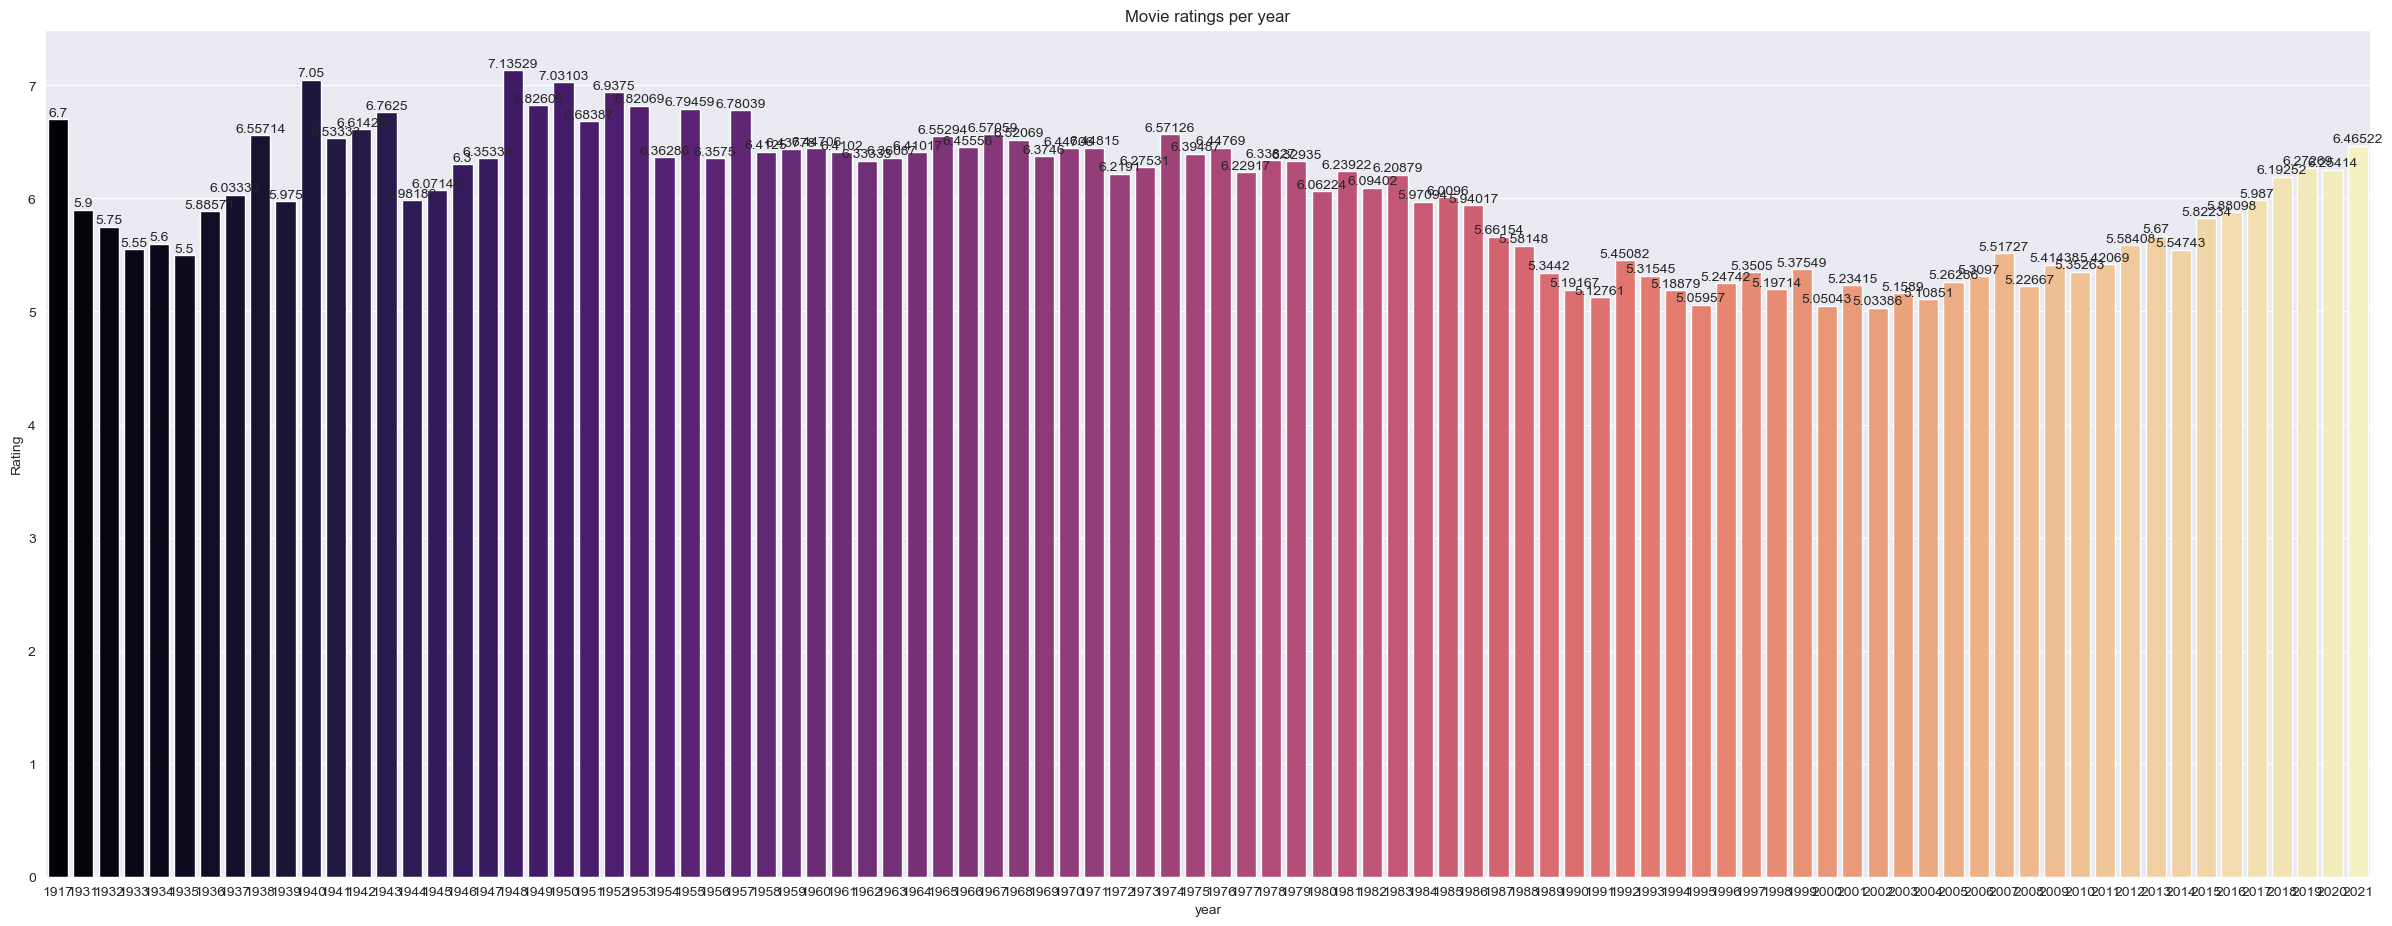

In [25]:
# average rating by year
year_rate = df.groupby('Year')['Rating'].mean().sort_values(ascending=False)
display(year_rate)
plt.figure(figsize=(30,11))
ax = sns.barplot(x=year_rate.index, y=year_rate.values, palette='magma')
ax.bar_label(ax.containers[0])
plt.title('Movie ratings per year')
plt.ylabel('Rating')
plt.xlabel('year')
plt.show()

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Bobby Kumar         9.6
Arvind Pratap       9.4
Munni Pankaj        9.4
Suhrud Godbole      9.4
Nikhil Mahar        9.3
Venkatesh Bk        9.3
Rahul Mallick       9.3
Raghav Jairath      9.3
Vishwa Bhanu        9.3
Gautam Joshi        9.3
Rajat Bhardwaj      9.3
Sapna Bhavnani      9.3
Utpal Kalal         9.2
Name: Rating, dtype: float64

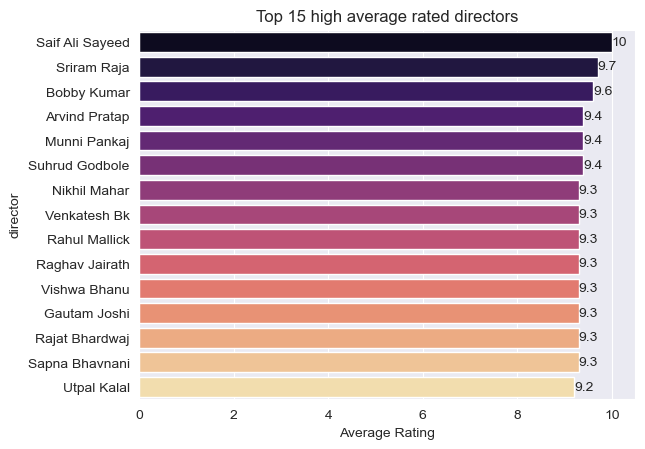

In [26]:
director_rate = df.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(15)
display(director_rate)
ax = sns.barplot(x=director_rate.values, y=director_rate.index, palette='magma')
ax.bar_label(ax.containers[0])
plt.title('Top 15 high average rated directors')
plt.xlabel('Average Rating')
plt.ylabel('director')
plt.show()

Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Dharmendra Ahir       9.4
Nishi Neha Mishra     9.4
Vaibhav Khisti        9.4
Leila Advani          9.3
Amrit                 9.3
Prashant Chaubey      9.3
Vishwa Bhanu          9.3
Vijay Mahar           9.3
Kunj Anand            9.3
Tejaswini Manogna     9.3
Bobby Darling         9.2
Subramanian Swamy     9.2
Raghu Babu            9.1
Name: Rating, dtype: float64

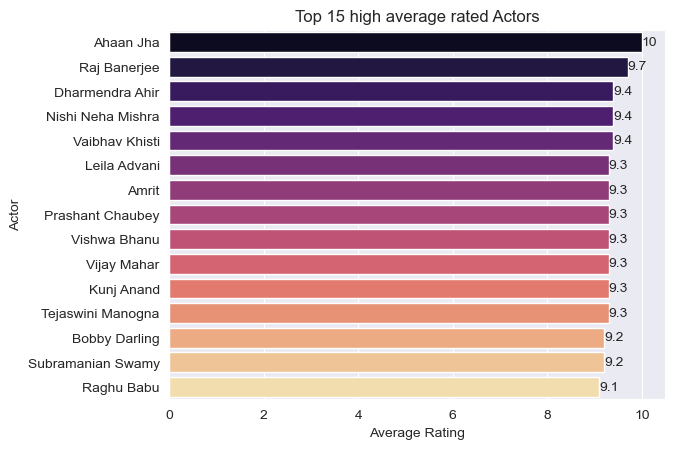

In [27]:
Actor_rate = df.groupby('Actor 1')['Rating'].mean().sort_values(ascending=False).head(15)
display(Actor_rate)
ax = sns.barplot(x=Actor_rate.values, y=Actor_rate.index, palette='magma')
ax.bar_label(ax.containers[0])
plt.title('Top 15 high average rated Actors')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.show()

### Model Evaluation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
#Modeling:
actor1 = df.groupby('Actor 1')['Rating'].mean().to_dict()
df['Actor 1'] = round(df['Actor 1'].map(actor1),2)
actor2 = df.groupby('Actor 2')['Rating'].mean().to_dict()
df['Actor 2'] = round(df['Actor 2'].map(actor2),2)
actor3 = df.groupby('Actor 3')['Rating'].mean().to_dict()
df['Actor 3'] = round(df['Actor 3'].map(actor3),2)

genre = df.groupby('Genre')['Rating'].mean().to_dict()
df['Genre'] = round(df['Genre'].map(genre),2)

drct = df.groupby('Director')['Rating'].mean().to_dict()
df['Director'] = round(df['Director'].map(drct),2)

In [30]:
df.drop(['Name'],axis=1,inplace=True)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,6.35,7.0,8,7.00,6.85,7.00,7.00
3,2019,110.0,5.70,4.4,35,4.40,5.42,4.40,4.45
5,1997,147.0,6.22,4.7,827,5.36,4.79,5.79,5.77
6,2005,142.0,6.82,7.4,1086,7.50,5.30,6.05,6.50
8,2012,82.0,5.46,5.6,326,5.60,5.60,5.88,5.60


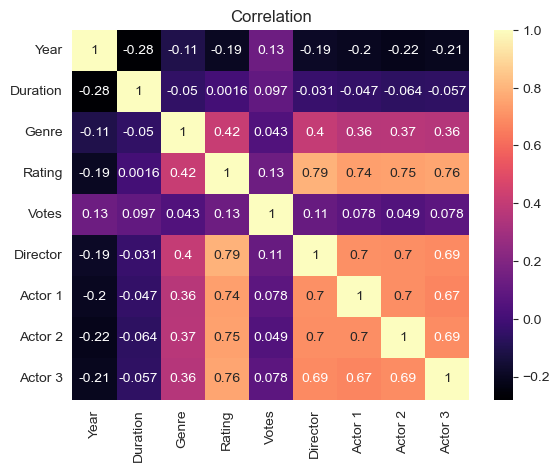

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title('Correlation')
plt.show()

####  Linear Regression Model

In [32]:
X = df[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
Y = df['Rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape,X_train.shape, X_test.shape,Y.shape, Y_train.shape, Y_test.shape)
print(Y_test)

(7558, 8) (6046, 8) (1512, 8) (7558,) (6046,) (1512,)
6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
13618    6.3
11911    6.3
14552    7.2
7792     6.8
14312    4.9
Name: Rating, Length: 1512, dtype: float64


In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, Y_train)

LinearRegression()

In [35]:
pred = model.predict(X_test)
rounded_predictions = np.round(pred[0:10], 2)
print(rounded_predictions)
print(np.round(Y_test[0:10], 2))
#Evaluate the model's performance
r2 = r2_score(Y_test, pred)
print(f'R-squared: {r2}')
mse = mean_squared_error(Y_test, pred)
print(f'Mean Squared Error: {mse}')

[6.6  5.46 6.33 5.55 6.94 4.55 5.12 6.86 5.45 7.13]
6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
9928     4.1
7846     5.7
14588    6.9
5735     5.4
3483     6.9
Name: Rating, dtype: float64
R-squared: 0.7582163328740572
Mean Squared Error: 0.44798581851760844


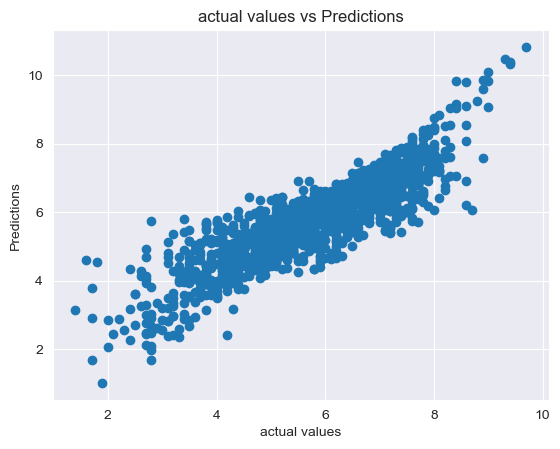

In [36]:
#Visualize the predictions compared to the actual values
plt.scatter(Y_test, pred)
plt.xlabel('actual values')
plt.ylabel('Predictions')
plt.title('actual values vs Predictions')
plt.show()

We observe a linear correlation between actual values and predictions, suggesting that the linear regression model is functioning effectively with an accuracy of approximately 75%

### Summary:
- The genres with the highest average ratings include History, Romance, Documentary, History, Family, and Documentary, Music
- There is no correlation between the rating of a movie and its duration
- The movies of the year 1948 received high average ratings
- The Directors with the highest average ratings include  Saif Ali Sayeed, Sriram Raja and Bobby Kumar
- The Actors with the highest average ratings include  Ahaan jha, Raj Banerjee and Dharmendra Ahir
- We note a linear correlation between the observed values and predictions, indicating effective functioning of the linear regression model with an accuracy of around 75%